# Examen parcial 3 v2. (calculo numerico y algebra lineal)
* Antes de enviar el archivo, $\textbf{reiniciar y ejecutar el kernel}$ para ver que el archivo se compila sin errores
* enviar el archivo jupyter sin anexos antes de las 11.00am del 06.04.2022 a mi dirección de correo electrónico: michal.hemmerling@udea.edu.co 

In [78]:
import pandas as pd
import numpy as np
import scipy
import scipy.integrate as integrate
from matplotlib import pyplot as plt

# Ejercicio 1

Masa de una barra delgada en el intervalo [a, b] es dada por Integral:

$$ m =  \int_{a}^{b} \rho (x) \ dx $$

donde $\rho(x)$ es una función de densidad linear

<table><tr>
<td> <img src="rod.jpg" width="300" /> </td>
</tr></table>   


El archivo data_distance_density.csv contiene dos columnas: la distancia un la barra ($ x $) y la densidad ($ \rho (x) $) de la barra como función del distancia.

* a) importar los datos usando pandas, graficar la densidad de la barra $\rho(x)$ vs $x$ (los gráficos deben tener etiquetas para el eje x y el eje y).

* b) calcular la masa de la barra mediante integración numérica

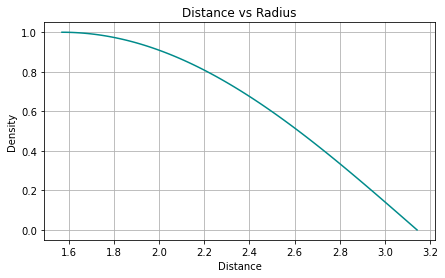

In [79]:
#a)
#read dataframe
df = pd.read_csv('data_distance_density.csv')
df.head()

#plot
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(df['distance'], df['density'], color='darkcyan')
ax.set_title('Distance vs Radius')
ax.set_ylabel('Density')
ax.set_xlabel('Distance')
ax.grid()

In [80]:
#b)

rho = df['density']
d = df['distance']
I_trapz=integrate.trapz(rho,d) #method trapz
I_simps=integrate.simps(rho,d) #method simpson
print(f'I trapezoid method I = {I_trapz} and  Simpson method I = {I_simps}')

I trapezoid method I = 0.9999790207508321 and  Simpson method I = 0.9999998326009375


La masa de la barra es m = 1 unidades de masa

# Ejercicio 2

La capacidad calorífica de un gas muy frío se puede aproximar mediante:

$$ C_v \approx \left (\frac{dP}{dT} \right) $$
(en las unidades de $ \left [\frac {J} {K} \right] $)

Donde $P$ es la presión $ [J / s^3] $ del gas y $ T \ [K] $ es la temperatura del gas.

Los datos para la presión frente a la temperatura se dan en el archivo csv data_pressure_vs_temperature.csv

* a) importar los datos usando Pandas
* b) hacer un gráfico de $P$ vs $T$ (grafico tiene que tener etiquietas)
* c) utilizando la derivada numérica, encuentre la capacidad calorífica y hace un gráfico de $C_v$ vs $T$ (grafico tiene que tener etiquietas)
* d) encontrar Temperatura Critica de este gas (Temperatura Critica es Temperatura de cambio abrupto del comportamiento de Capacidad Termica)

*gas muy frío se refiere a un gas Bose no homogéneo, y la teoría que relaciona $ C_v $ y $ P $ se refiere a la Teoría de Variables Globales Termodinámicas. La presión en realidad se llama parámetro de presión.

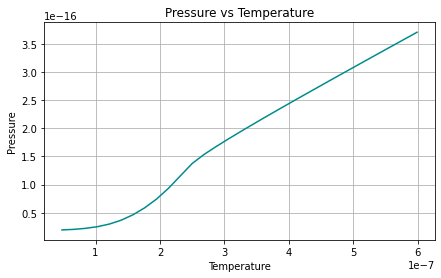

In [81]:
#a) read the file
df2 = pd.read_csv('data_pressure_vs_temparature (1).csv')
df2.head()

#b)plot
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(df2['Temperature'], df2['Pressure'], color='darkcyan')
ax.set_title('Pressure vs Temperature')
ax.set_ylabel('Pressure')
ax.set_xlabel('Temperature')
ax.grid()

La capacidad calorifica: C = [5.29799802e-11 7.61486415e-11 1.30352287e-10 2.06082997e-10
 3.12475005e-10 4.48916825e-10 6.02904968e-10 7.63919658e-10
 9.40191259e-10 1.11550372e-09 1.19769793e-09 1.03501324e-09
 8.09658111e-10 7.30340985e-10 7.01723220e-10 6.84061313e-10
 6.71936615e-10 6.63114111e-10 6.56443006e-10 6.51256053e-10
 6.47135543e-10 6.43805355e-10 6.41075324e-10 6.38810197e-10
 6.36911237e-10 6.35304785e-10 6.33934876e-10 6.32758315e-10
 6.31741302e-10 6.30857069e-10 6.30445179e-10]


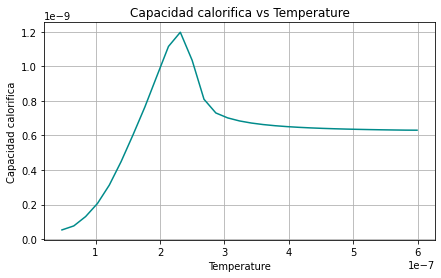

In [82]:
#c)
#Capacidad calorifica
p = df2['Pressure'] #y
T = df2['Temperature'] #x

y_grad = np.gradient(p, T) #capacidad calorifica
print(f'La capacidad calorifica: C = {y_grad}')

#plot
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(T,y_grad, color='darkcyan')
ax.set_title('Capacidad calorifica vs Temperature')
ax.set_ylabel('Capacidad calorifica')
ax.set_xlabel('Temperature')
#ax.set_xlim(2,3)
ax.grid()

In [83]:
#d)
#determinemos la posicion donde se encuentra el cambio abrupto en la capacidad calorifica
position = 0
for i in y_grad:
    if i!=y_grad.max():
        position += 1
    else:
        break

print(position)
print(f'La temperatura critica del gas: T = {T[10]} K')

10
La temperatura critica del gas: T = 2.3147805092375505e-07 K


# Ejercicio 3.

Grafica la función:

$$ F_{a, b} = \int_0 ^{10} sin (ax) + cos (bx^ 2) \ \ dx $$

donde $ a $ es solo un número:

`a = 1`

y $ b $ es una numpy arrray, digamos:
 
`b = np.linspace (0,1,101)`

El gráfico deben tener etiquetas para eje `x` y eje `y`. 

Para b=0.0 la integral tiene una valor de I=11.83907152907645
Para b=0.01 la integral tiene una valor de I=10.884313908079175
Para b=0.02 la integral tiene una valor de I=8.515040010548136
Para b=0.03 la integral tiene una valor de I=5.8986216678891825
Para b=0.04 la integral tiene una valor de I=4.146378841242533
Para b=0.05 la integral tiene una valor de I=3.680068026426795
Para b=0.06 la integral tiene una valor de I=4.107141409700076
Para b=0.07 la integral tiene una valor de I=4.634499802826114
Para b=0.08 la integral tiene una valor de I=4.671901426034708
Para b=0.09 la integral tiene una valor de I=4.181950054844015
Para b=0.1 la integral tiene una valor de I=3.570902690998634
Para b=0.11 la integral tiene una valor de I=3.276528404228981
Para b=0.12 la integral tiene una valor de I=3.41130271655838
Para b=0.13 la integral tiene una valor de I=3.7248746041192042
Para b=0.14 la integral tiene una valor de I=3.8646587184390513
Para b=0.15 la integral tiene una valor de I=3.6814676

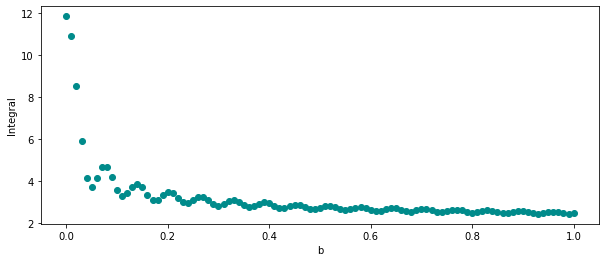

In [84]:
x = np.linspace(0,10,100)

def function(x,b):
    return (np.sin(a*x)+np.cos(b*x**2))

a = 1 #arg
b = np.linspace(0,1,101) #arg

Is=[]
for i in b:
    I,error = integrate.quad(function, 0, 10, args=(i,))
    Is.append(I)


fig,ax = plt.subplots(1,1, figsize=(10,4))
ax.scatter(b,Is, color='darkcyan')
ax.set_xlabel('b')
ax.set_ylabel('Integral')


for i in range(len(b)):
    print(f'Para b={b[i]} la integral tiene una valor de I={Is[i]}')


## Ejercicio 4. Algebra linear.
#### Introducion:

En varios casos, sistema de equaciones diferentiales lineares
tipo 
$$\frac{d\textbf{x}}{dt}=\textbf{A}\textbf{x}$$
con solucion:
$$ \textbf{x}(t) = e^{t\textbf{A}} \textbf{C}$$

(donde $\textbf{x}$ es un vector, $\textbf{A}$ es matrix y $\textbf{C}$ es vector de condiciones iniciales)

se simplifica a calcular exponente de matriz: $e^{\textbf{A}t}$!!!!

$\textbf{Como ejercicio, calcule $e^{A}$}$ definido como:

$$e^A=Pe^DP^{-1}$$
$$Pe^A=Pe^D$$

donde $e^D$ es

$$e^D=
\begin{bmatrix}
e^{\lambda_1} & 0 & \cdots & 0 \\
0 & e^{\lambda_2} & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots\\
0 & 0 & \cdots & e^{\lambda_n} \\
\end{bmatrix}
$$

$P$ son eigenvectors y $P^{-1}$ es inversion de $P$

* a) Construye una function matrix_exp(A) que acepta una matrix A como un argumento
* b) si matrix no es cuadrada: imprime "Matrix must be square" y sale la funcion usando: $\textbf{return}$
* c) si matrix es cuadrada ($\textbf{else:}$): calcule y imprime valor de $e^A$
* para verificar su resultado uno puede usar scipy.linalg.expm(A)

In [85]:
def matrix_exp(A):
    if np.shape(A)[0] != np.shape(A)[1]:
        return print('Matrix must be square')

    else:
        diag = []
        evalues_A,evectors_A = np.linalg.eig(A)
        for i in range(0,np.shape(a)[0]):
            element = np.exp(evalues_A[i])
            diag.append(element)
    e_D = np.diagflat(diag)

    P = evectors_A
    Pinv = np.linalg.inv(P)
    e_A = np.matmul(P,np.matmul(e_D,Pinv))

    return e_A
    

In [86]:
from scipy.linalg import expm
a = np.array([[-1,-7,1], 
            [0,4,0],
            [-1,13,-3]])
expm(a)

array([[ 2.70670566e-01, -5.45981500e+01,  1.35335283e-01],
       [-3.23892301e-18,  5.45981500e+01,  1.33349939e-16],
       [-1.35335283e-01,  1.09060965e+02,  2.80507756e-16]])

In [87]:
matrix_exp(a)

array([[ 2.70670566e-01, -5.45981500e+01,  1.35335282e-01],
       [ 0.00000000e+00,  5.45981500e+01,  0.00000000e+00],
       [-1.35335283e-01,  1.09060965e+02,  4.65661287e-10]])

# Feedback:
```
Exercise 1.
Solution + presentation of the results	            (max 2.5p):	2.5p

Exercise 2.
Solution + presentation of the results	            (max 2.5p):	2.5p

Exercise 3.
Solution + presentation of the results	            (max 2.5p):	2.5p

Exercise 4 ODEINT.
Solution + presentation of the results	            (max 2.5p):	2.5p


- Total:                                              (max 10.0p):   10.0p
```